In [412]:
# NAME:           THEMBA NGOBENI
# STUDENT NUMBER: 1334236
# Assignment I:   LINEAR REGRESSION

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [413]:
# IMPORT DATA
my_data=pd.read_csv("Salary_data.csv")
my_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [414]:
# DEPENDENT AND INDEPENDENT VARIABLES
X=my_data["YearsExperience"]
Y=my_data["Salary"]

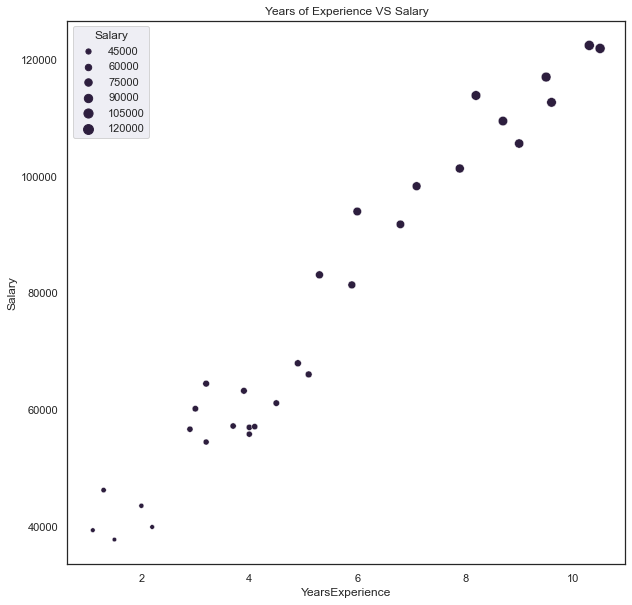

In [415]:
# DATA DISTRIBUTION VISUALIZATION
# plotting original data distributaion
fig,ax=plt.subplots(ncols=1,figsize=(10,10))
sns.set()
ax.set_title("Years of Experience VS Salary")
sns.scatterplot(x="YearsExperience",y="Salary",hue="Salary",size="Salary" ,sizes=(20, 100),hue_norm=(0, 100),data=my_data,ax=ax)
plt.show()




In [416]:
# Split data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=79)

In [417]:
# FEATURE STANDARDIZATION
X_standardizer=(X_train-X_train.mean())/X_train.std()
X_standardizer=(X_test-X_train.mean())/X_train.std()

In [418]:
# LINEAR REGRESSION ALGORITHM
# DEFINING LEARNING RATE (α or alpha) and ITERATIONS
def LR(X,Y,learning_rate,iterations):
    #     
    # (θ is THETA) since d=1 i.e y = θ0*x0 + θ1*x1
    # Initialize θ0 and θ1 (i.e  theta_0 and theta_1)   
    # we know x0=1 hence y = θ1*x1 + θ0

    
    theta_1=0
    theta_0=0

    J=[]                                   # an empty list for storing the cost values in each iteration 
    
    # empty lists for storing the theta values in each iteration
    θ_1=[]
    θ_0=[]
    
    n=np.size(X)                           # size of the dataset

    # IMPLEMENTING  COST FUNCTION 
    # GRADIENT DESCENT    
    for i in range(iterations):
        h=theta_0+theta_1*X                #hypothesis functions is equivalent to y=θ1*x1 + θ0 hence h=θ1*x1+θ0
        J_theta=(1/2*n)*np.sum((h-Y)**2)   #The COST FUNCTION
        J.append(J_theta)                  #append/store the cost for each iteration
        # θ has alread initialized since θ=(θ0,θ1) and initially θ0=θ1=0  
        d_theta_1=(-2/n)*np.sum(X*(Y-h))   #
        d_theta_0=(-2/n)*np.sum(Y-h)       #
        theta_1=theta_1-learning_rate*d_theta_1   
        theta_0=theta_0-learning_rate*d_theta_0 
    
    # append/store the cost for each iteration
    θ_1.append(theta_1)
    θ_0.append(theta_0)
    # removing square brakets [] for clean print out     
    r_0 = str(θ_0)[1:-1]
    r_1 = str(θ_1)[1:-1]
    # print out each value of theta_1 and theta_0 when LR/linear regression function is called
    print(" θ1 is {} and  θ0 is {}".format(r_1,r_0))
    return J,θ_1,θ_0

In [419]:
# CHECKING DIFFERENT VALUES OF the learning rate (alpha)
# J_1 has the largest alpha/learning rate and J_5 has the smallest alpha
cost_1,theta_1,theta_0 = LR(X_train, Y_train, learning_rate=0.001, iterations=30)
cost_2,theta_1,theta_0 = LR(X_train, Y_train, learning_rate=0.0001, iterations=30)
cost_3,theta_1,theta_0 = LR(X_train, Y_train, learning_rate=0.0003, iterations=30)
cost_4,theta_1,theta_0 = LR(X_train, Y_train, learning_rate=0.0005, iterations=30)
cost_5,theta_1,theta_0 = LR(X_train, Y_train, learning_rate=0.000009, iterations=30)



 θ1 is 11731.901024094397 and  θ0 is 2030.516239751827
 θ1 is 2605.845618772716 and  θ0 is 417.8136625167366
 θ1 is 6392.548610501946 and  θ0 is 1039.8732294798665
 θ1 is 8832.728056300315 and  θ0 is 1460.089291324229
 θ1 is 258.1656439528997 and  θ0 is 41.1458972352294


 θ1 is 9663.757382454065 and  θ0 is 21868.848981438266


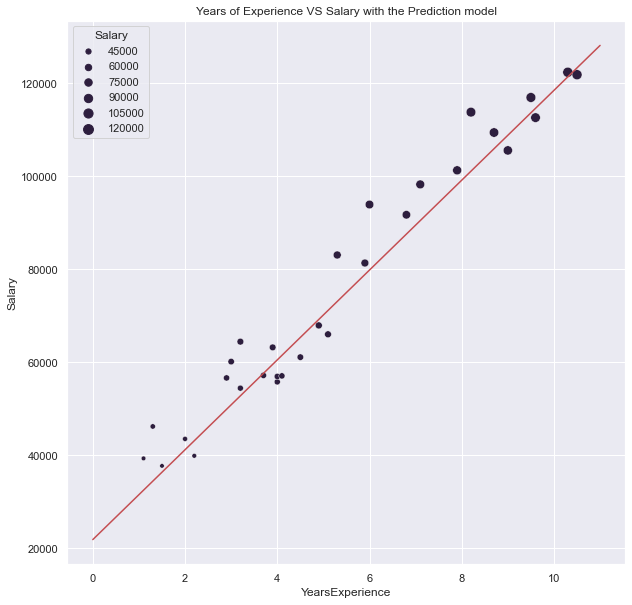

In [420]:
# J_0 is the function with a best fit prediction line(
cost_0,theta_1,theta_0 = LR(X_test, Y_test, learning_rate=0.027, iterations=100)

# (θ is THETA) we know y = θ0*x0 + θ1*x1
# X_line is a straight line on 0 x=0 and y=0
# y_line takes in values of theta_1 and 
x_line = np.linspace(0,11,100)
y_line = theta_1*x_line + theta_0

# PLOT the data with the prediction model
fig, ax = plt.subplots(nrows=1, figsize=(10,10))
sns.set()
ax.set_title("Years of Experience VS Salary with the Prediction model")
sns.scatterplot(x="YearsExperience",y="Salary",hue="Salary",size="Salary" ,sizes=(20, 100),
                hue_norm=(0, 100),data=my_data)
plt.plot(x_line, y_line, c="r")

plt.show()

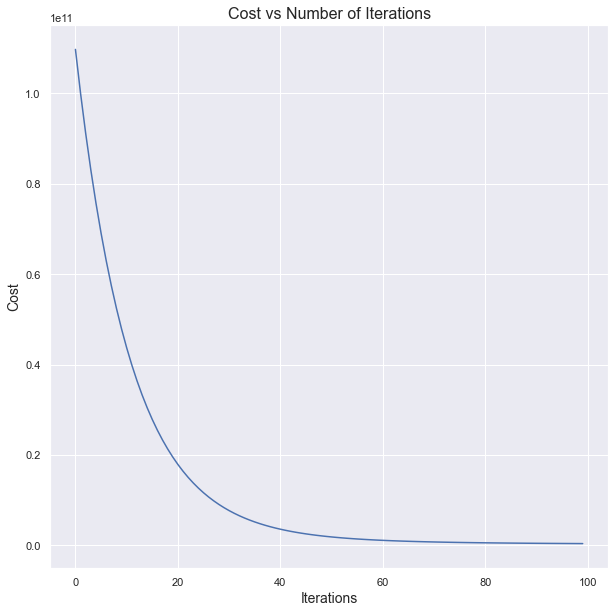

Lowest cost=380080765.1435332
Lowest cost=380080765.1435332


In [421]:
fig, ax = plt.subplots(nrows=1,figsize=(10,10))
sns.set()
ax = sns.lineplot(x=np.arange(0,100), y=J_0[:100], ax=ax)
ax.set_xlabel("Iterations", fontdict={"fontsize":14})
ax.set_ylabel("Cost", fontdict={"fontsize":14})
ax.set_title("Cost vs Number of Iterations", fontdict={"fontsize":16})
plt.show()
print("Lowest cost="+str(np.min(J_0)))
print("Lowest cost="+str(J_0[-1]))

In [422]:

costs = pd.DataFrame({
    "i": np.arange(0,30),
    "cost_1": cost_1,
    "cost_2": cost_2,
    "cost_3": cost_3,
    "cost_4": cost_4,
    "cost_5": cost_5
})

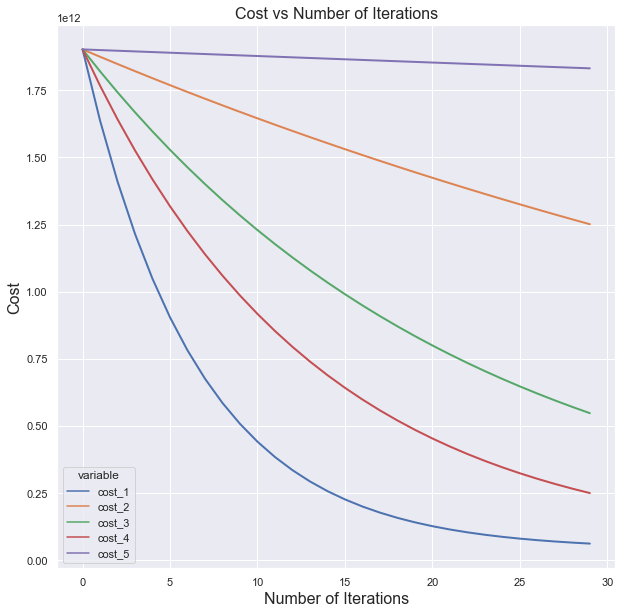

In [423]:
# PLOTTING ALL COST FUNCTIONS WITH DIFFENRENT ALPHA
# This shows how  alpha may change the convergence to the minimum
fig, ax = plt.subplots(nrows=1, figsize=(10,10))
sns.set()
ax = sns.lineplot(x="i", y="value", hue="variable", data=pd.melt(costs, ["i"]),linewidth = 2,  ax=ax)
ax.set_xlabel("Number of Iterations", fontdict={"fontsize":16})
ax.set_ylabel("Cost", fontdict={"fontsize":16})
ax.set_title("Cost vs Number of Iterations", fontdict={"fontsize":16})
plt.show()

In [424]:
# IMPROVING LEARNING
# FEATURE SCALING
# Scaling the data
scaler=StandardScaler()
scaled_data = scaler.fit_transform(my_data)
scaled_data = pd.DataFrame(scaled_data, columns=["Scaler_YearsOE", "Scaler_Salary"])
data_size=len(my_data)
table=pd.DataFrame({"Iterations": np.arange(0,data_size),
                "Sx":scaled_data["Scaler_YearsOE"],
                "Sy":scaled_data["Scaler_Salary"],
                "x":my_data["YearsExperience"],
                "y":my_data["Salary"]})
table.head()


,Iterations,Sx,Sy,x,y
0,0,-1.510053,-1.360113,1.1,39343.0
1,1,-1.438373,-1.105527,1.3,46205.0
2,2,-1.366693,-1.419919,1.5,37731.0
3,3,-1.187494,-1.204957,2.0,43525.0
4,4,-1.115814,-1.339781,2.2,39891.0


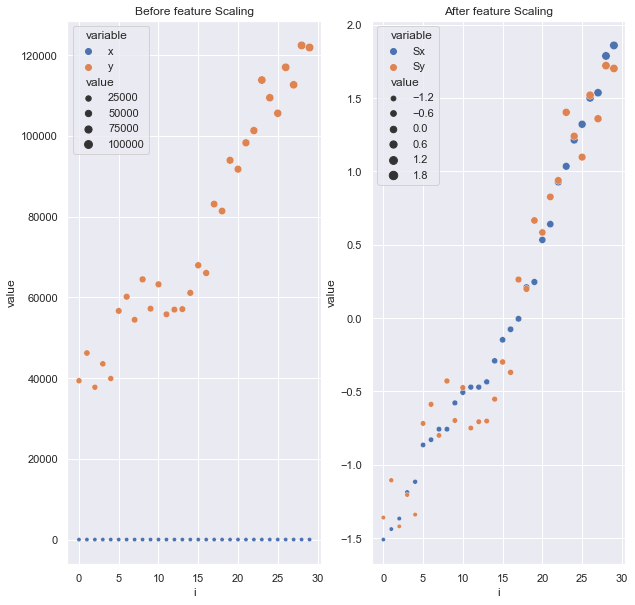

In [425]:
# VISUALIZING  FEATURE SCALED VS ORIGINAL DATA

# Using pd.DataFrame for aligning  data in a tabular fashion in rows and column 
# combine scaled data into 2D data stucture
Scaled=pd.DataFrame({"i": np.arange(0,data_size),
                "Sx":scaled_data["Scaler_YearsOE"],
                "Sy":scaled_data["Scaler_Salary"],
              })
# combine original/non-scaled data into 2D data stucture
Non_Scaled=pd.DataFrame({"i": np.arange(0,data_size),
                "x":my_data["YearsExperience"],
                "y":my_data["Salary"],
              })
# PLOTING THE ORIGINAL DATA AND THE SCALED DATA
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,10))
sns.set()
# Plot of original data 
ax1.set_title("Before feature Scaling")
ax=sns.scatterplot(x="i",y="value",hue="variable",size="value",data=pd.melt(Non_Scaled,["i"]),ax=ax1)
# Plot of scaled data 
ax2.set_title("After feature Scaling")
ax=sns.scatterplot(x="i",y="value",hue="variable",size="value",data=pd.melt(Scaled,["i"]),ax=ax2)

In [426]:
# VALIDATING MY DATA USING BUILT IN MODELS
from sklearn import linear_model  # Importing linear model
lm = linear_model.LinearRegression()   # Linear regression
X_train=np.array(my_data.iloc[:,:-1])
Y_train=np.array(my_data.iloc[:,-1])
X_train=X_train.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
lm.fit(X_train, Y_train)           # Fitting the data
# Printing the thetas (intercept and coefs)
print(lm.intercept_, lm.coef_)
# print(lm.coef_)

[25792.20019867] [[9449.96232146]]
